In [77]:
def readlines(datafile):
    f  = open(datafile, "r")
    lines = f.readlines()
    f.close()
    return lines

In [78]:
from os import getcwd, listdir
print(getcwd())
#datafile = ".././iris/iris_test.csv"
#datafile = "iris_test.csv"
#lines = readlines(datafile)
#print(len(lines))

/home/bayram/Documents/tfExp/jupyter


In [79]:
#images in :"/home/bayram/Documents/tfExp/images"
#we are at print(getcwd()), which is "/home/bayram/Documents/tfExp/jupyter"
import tensorflow as tf
#import skimage
import numpy as np
import matplotlib.pyplot as plt
from  skimage import data
from  os import environ
environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [110]:
def applyFilter(filename, xWindow = 0.5, yWindow = 0.5, numberOfSteps = 20, show = True, tfInteractive = True):
    img = data.imread(filename, as_grey=True).astype(np.float32)
    
    #plt.show()
    img_4d=tf.reshape(img, shape=(1,img.shape[1],img.shape[1],1))
    img_4d.get_shape()
    img_4d.get_shape().as_list()

#    xWindow = 0.5
#    yWindow = 0.5
#    numberOfSteps = 20

    #from a sine wave:
    ##xy = tf.linspace(-xWindow ,xWindow ,numberOfSteps)
    ##phi = 1.0
    ##y = tf.sin(xy * phi)

    mean = 0
    sigma = 0.015
    pi = 3.1415

    #form a gaussian:
    xz = tf.linspace(-yWindow,yWindow,numberOfSteps)
    z = tf.negative(tf.pow(xz - mean, 2.0))
    z = z / (2.0 * tf.pow(sigma, 2.0))
    z = tf.exp(z)
    z = z / (sigma * tf.sqrt(2.0*pi))

    #res = z.eval()

    #form a gabor filter:
    ksize = z.get_shape().as_list()[0]
    z_2d = tf.matmul(tf.reshape(z, [ksize,1]),tf.reshape(y, [1,ksize]) )
    z_4d = tf.reshape(z_2d, [ksize, ksize, 1,1])
    #apply the filter to the image:
    convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1,1,1,1], padding='SAME')
    

    if tfInteractive:
        res= convolved.eval()
        if show:
            plt.figure()
            plt.imshow(img, cmap='gray')
            plt.show()
            #show images by squeezing:
            #plt.imshow(np.squeeze(res), cmap='gray')
            #...or by defining exactly:
            plt.figure()
            plt.imshow(res[0,:,:,0])
            plt.show()
        imgRes = tf.placeholder(tf.float32, shape= [None, None], name='img')

        return convolved.eval()
    
    else:
        return convolved

In [106]:
def getImageNames(directory, prefix = "resized", ext = ".jpeg" ):
    fileList = listdir(directory)
    #print len(fileList)
    res = []
    for f in fileList:
        #if f.startswith(prefix)  and f.endswith(ext):
        if  f.endswith(ext):
            res.append(f)
    return res

['resized1A-16X1.jpeg', 'resized1A-16X0.jpeg', 'resized1A-16X2.jpeg']


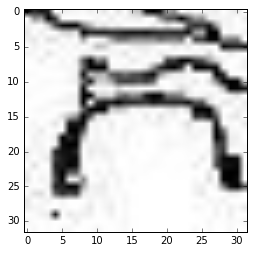

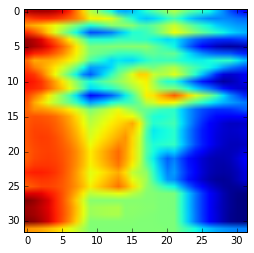

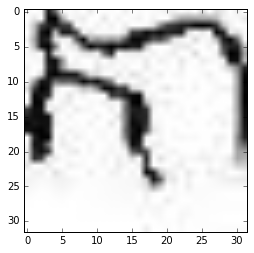

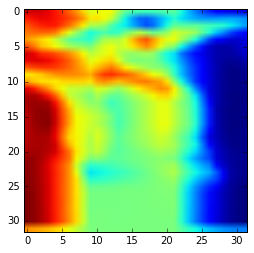

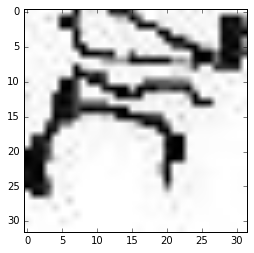

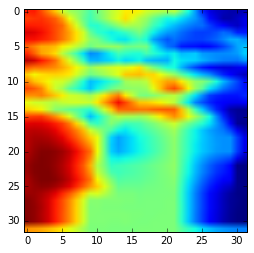

In [113]:
filename = "../images/resized1A-16X0.jpeg"

dirName = "../images"
files =  getImageNames(dirName)
print files

sess = tf.InteractiveSession()
tfInteractive= True
for f in files:
    applyFilter(dirName + "/" + f, show = True, tfInteractive=tfInteractive)